<a href="https://colab.research.google.com/github/uplus26e7/pytorch-programming-introduction/blob/master/%E5%8B%95%E3%81%8B%E3%81%97%E3%81%AA%E3%81%8C%E3%82%89%E5%AD%A6%E3%81%B6_PyTorch_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80_Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

# Section 1 テンソル(Tensor)

## Section 1.1 Tensorの生成

In [2]:
x =torch.tensor([1, 2, 3])
x

tensor([1, 2, 3])

In [3]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [4]:
x.size()

torch.Size([2, 3])

In [5]:
x.shape

torch.Size([2, 3])

In [6]:
x1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
x1.dtype

torch.int64

In [7]:
x2 = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64)
x2.dtype

torch.float64

In [8]:
x3 = torch.DoubleTensor([[1, 2, 3], [4, 5, 6]])
x3.dtype

torch.float64

In [9]:
x = torch.arange(0, 10)
x

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
x = torch.linspace(0, 10, 5)
x

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [11]:
x = torch.rand(2, 3)
x

tensor([[0.0398, 0.7442, 0.4576],
        [0.8925, 0.5946, 0.9712]])

In [12]:
x = torch.zeros(2, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [13]:
x = torch.ones(2, 3)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [14]:
x = torch.tensor([1, 2, 3]).to('cuda')
x.device

device(type='cuda', index=0)

## Section 1.2 Tensorとndarrayの変換

In [15]:
array = np.array([[1, 2, 3], [4, 5, 6]])
array

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
tensor = torch.from_numpy(array)
tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [17]:
tensor2array = tensor.numpy()
tensor2array

array([[1, 2, 3],
       [4, 5, 6]])

## Section 1.3 Tensorの操作

In [18]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x[1, 2]

tensor(6)

In [19]:
x[1, :]

tensor([4, 5, 6])

In [20]:
x_reshape = x.view(3, 2)
x_reshape

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Section 1.4 Tensorの演算

In [21]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [22]:
x + 2

tensor([[3, 4, 5],
        [6, 7, 8]])

In [23]:
x - 2

tensor([[-1,  0,  1],
        [ 2,  3,  4]])

In [24]:
x * 2

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [25]:
x / 2

tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])

In [26]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64)
y = torch.tensor([[4, 5, 6], [7, 8, 9]], dtype=torch.float64)

In [27]:
x + y

tensor([[ 5.,  7.,  9.],
        [11., 13., 15.]], dtype=torch.float64)

In [28]:
x - y

tensor([[-3., -3., -3.],
        [-3., -3., -3.]], dtype=torch.float64)

In [29]:
x * y

tensor([[ 4., 10., 18.],
        [28., 40., 54.]], dtype=torch.float64)

In [30]:
x / y

tensor([[0.2500, 0.4000, 0.5000],
        [0.5714, 0.6250, 0.6667]], dtype=torch.float64)

In [31]:
torch.max(x)

tensor(6., dtype=torch.float64)

In [32]:
torch.min(x)

tensor(1., dtype=torch.float64)

In [33]:
torch.mean(x)

tensor(3.5000, dtype=torch.float64)

In [34]:
torch.sum(x)

tensor(21., dtype=torch.float64)

In [35]:
torch.sum(x).item()

21.0

# Section 2 自動微分(AUTOGRAD)

In [36]:
a = torch.tensor(3, requires_grad=True, dtype=torch.float64)
b = torch.tensor(4, requires_grad=True, dtype=torch.float64)
x = torch.tensor(5, requires_grad=True, dtype=torch.float64)

y = a*x + b
y

tensor(19., dtype=torch.float64, grad_fn=<AddBackward0>)

In [37]:
y.backward()

In [38]:
a.grad

tensor(5., dtype=torch.float64)

In [39]:
b.grad

tensor(1., dtype=torch.float64)

In [40]:
x.grad

tensor(3., dtype=torch.float64)

# Section 3 ニューラルネットワークの定義

## Section 3.1 nn.Sequentialを使う方法

In [41]:
net = nn.Sequential(
    nn.Conv2d(1, 6, 3),
    nn.MaxPool2d((2, 2)),
    nn.ReLU(),
    nn.Conv2d(6, 16, 3),
    nn.MaxPool2d(2),
    nn.ReLU()
)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
)

## Section 3.2 自作のクラスを使う方法

In [42]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    return x

net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
)

## Section 3.3 GPUを使う場合

In [43]:
net = Net().to('cuda')
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
)

# Section 4 損失関数

## Section 4.1 バイナリ交差エントロピー損失(nn.BCELoss)

In [44]:
m = nn.Sigmoid()
y = torch.rand(3)
t = torch.empty(3, dtype=torch.float32).random_(2)
criterion = nn.BCELoss()
loss = criterion(m(y), t)

In [45]:
y

tensor([0.1649, 0.5454, 0.2784])

In [46]:
m(y)

tensor([0.5411, 0.6331, 0.5691])

In [47]:
t

tensor([0., 1., 0.])

In [48]:
loss

tensor(0.6927)

## Section 4.2 ロジット付きバイナリ交差エントロピー損失(nn.BCEWithLogitsLoss)

In [49]:
criterion = nn.BCEWithLogitsLoss()
loss = criterion(y, t)
loss

tensor(0.6927)

## Section 4.3 ソフトマットクス交差エントロピー損失(nn.CrossEntropyLoss)

In [50]:
y = torch.rand(3, 5)
t = torch.empty(3, dtype=torch.int64).random_(5)
criterion = nn.CrossEntropyLoss()
loss = criterion(y, t)

In [51]:
y

tensor([[0.9034, 0.9888, 0.7779, 0.3922, 0.5328],
        [0.1598, 0.8288, 0.0912, 0.6955, 0.6764],
        [0.2820, 0.9529, 0.2993, 0.8708, 0.8397]])

In [52]:
t

tensor([4, 3, 3])

In [53]:
loss

tensor(1.5658)

## Section 4.4 平均二乗誤差損失(nn.MSELoss)

In [54]:
y = torch.rand(1, 10)
t = torch.rand(1, 10)
criterion = nn.MSELoss()
loss = criterion(y, t)
loss

tensor(0.1910)

## Section 4.5 平均絶対誤差損失(nn.L1Loss)

In [55]:
criterion = nn.L1Loss()
loss = criterion(y, t)
loss

tensor(0.3811)

# Section 5 最適化関数

In [56]:
class Net(nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H)
    self.linear2 = nn.Linear(H, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [57]:
N = 64
D_in = 1000
H = 100
D_out = 10
epoch = 100

In [58]:
x = torch.rand(N, D_in)
y = torch.rand(N, D_out)

In [59]:
net = Net(D_in, H, D_out)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.99), eps=1e-7)

In [60]:
loss_list = []

for i in range(epoch):
  y_pred = net(x)
  loss = criterion(y_pred, y)
  print(f"Epoch: {i + 1}, Loss: {loss.item():.3f}")
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 1, Loss: 0.380
Epoch: 2, Loss: 0.334
Epoch: 3, Loss: 0.294
Epoch: 4, Loss: 0.258
Epoch: 5, Loss: 0.226
Epoch: 6, Loss: 0.199
Epoch: 7, Loss: 0.175
Epoch: 8, Loss: 0.155
Epoch: 9, Loss: 0.138
Epoch: 10, Loss: 0.125
Epoch: 11, Loss: 0.114
Epoch: 12, Loss: 0.106
Epoch: 13, Loss: 0.100
Epoch: 14, Loss: 0.096
Epoch: 15, Loss: 0.093
Epoch: 16, Loss: 0.092
Epoch: 17, Loss: 0.091
Epoch: 18, Loss: 0.090
Epoch: 19, Loss: 0.089
Epoch: 20, Loss: 0.089
Epoch: 21, Loss: 0.088
Epoch: 22, Loss: 0.087
Epoch: 23, Loss: 0.087
Epoch: 24, Loss: 0.086
Epoch: 25, Loss: 0.086
Epoch: 26, Loss: 0.085
Epoch: 27, Loss: 0.084
Epoch: 28, Loss: 0.084
Epoch: 29, Loss: 0.083
Epoch: 30, Loss: 0.082
Epoch: 31, Loss: 0.082
Epoch: 32, Loss: 0.081
Epoch: 33, Loss: 0.080
Epoch: 34, Loss: 0.079
Epoch: 35, Loss: 0.078
Epoch: 36, Loss: 0.078
Epoch: 37, Loss: 0.077
Epoch: 38, Loss: 0.076
Epoch: 39, Loss: 0.076
Epoch: 40, Loss: 0.075
Epoch: 41, Loss: 0.074
Epoch: 42, Loss: 0.074
Epoch: 43, Loss: 0.073
Epoch: 44, Loss: 0.0

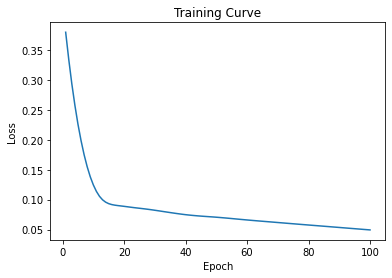

In [61]:
plt.figure()
plt.title("Training Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(1, epoch + 1), loss_list)